In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np

# Nonlinear ODEs

**ODE with nonlinear source term**
$$
\frac{\partial^2u}{\partial x^2} = f(x,u)
$$

**start with a guess solution for $u$. ($u^*$)**\
**Derive Taylor series source term around $u^*$**
$$
f(x,u) = f(x,u^*)+(u-u^*)\frac{df(u^*)}{du} + \dots
$$
**truncate \@ first order**
$$
f(x,u) \approx f(x,u^*)+(u-u^*)\frac{df(u^*)}{du}
$$
**substitute into ODE**
$$
\frac{\partial^2u}{\partial x^2} = f(x,u^*)+(u-u^*)\frac{df(u^*)}{du} + \dots
$$

**discretize**
$$
\frac{u_{i-1}-2u_i+u_{i+1}}{\Delta x^2} = f(x,u^*)+(u-u^*)\frac{df(u^*)}{du}
$$
**collect terms**
<div>
<img src="Screenshot 2022-04-21 143102.png" width="350"/>
</div>

**build matrix**
<div>
<img src="Screenshot 2022-04-21 143235.png" width="600"/>
</div>
<div>
<img src="Screenshot 2022-04-21 143348.png" width="600"/>
</div>

<div>
<img src="Screenshot 2022-04-21 141753.png" width="600"/>
</div>
<div>
<img src="Screenshot 2022-04-21 144650.png" width="600"/>
</div>
<div>
<img src="Screenshot 2022-04-21 144715.png" width="600"/>
</div>

Final error: 1.8973636102504077e-07


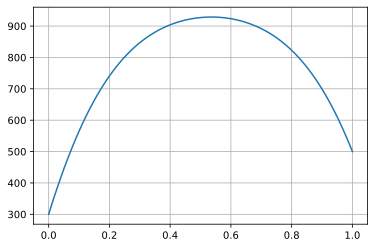

In [8]:
n = 100 # num of grid points
x0 = 0
L = 1
α = 1e-8
TL = 300 # K
TR = 500 # K
Tinf = 1000 # K

x = np.linspace(0, L, n)
dx = x[1] - x[0]

ld = np.ones(n-1)
ld[-1] = 0.0

ud = np.ones(n-1)
ud[0] = 0.0


Tstar = 300 * np.ones(n) # initial guess
tol = 1e-2
err = 1000

while (err > tol):
    d = -(2 + 4*α*dx**2*Tstar**3)
    d[0] = 1.0
    d[-1] = 1.0
    
    rhs = -α * dx**2 * (3*Tstar**4 + Tinf**4)
    rhs[0] = TL
    rhs[-1] = TR
    
    A = np.diag(ld, -1) + np.diag(d, 0) + np.diag(ud, 1)
    
    sol = np.linalg.solve(A, rhs)
    
    err = np.linalg.norm(sol - Tstar, 2)
    Tstar = sol

print(f'Final error: {err}')
plt.plot(x, sol)
plt.grid()

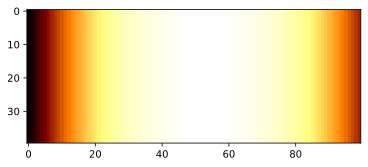

In [9]:
temperature = np.tile(sol,(40,1))
plt.imshow(temperature,cmap='afmhot')